Final Project:
Shavez Ahmad Azmi-100938606   
Rehan Ahmed-100889797   
Aman Deep Gangwar-100935748   
Kandarp Joshi - 100943058   

The goal of this project is to use object detection methods to build a real-time system that can find hats. The goal is to show that you can build a full machine learning model from start to finish, including gathering data and making predictions. Object detection is the process of automatically finding and locating objects of interest in pictures or videos. It is an important job in many areas, such as smart traffic management, surveillance systems, and medical imaging.

This block sets up the PyTorch requirements that are needed, such as torch, torchvision, and torchaudio. The -f flag tells the installer where to find the PyTorch release. In this case, it's the Long-Term Support (LTS) version 1.8 URL. This makes sure that the right versions of the PyTorch libraries are loaded, ones that work with the YOLOv5 model.

In [ ]:
# 1. Install and Import Dependencies

In [88]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB 5.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.4 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------  2.4/2.4 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 10.0 MB/s eta 0:00:00


After this we clone the yolo git repository

In [89]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


This block uses the cd command to go to the yolov5 directory and then the pip install command to install the dependencies listed in the requirements.txt file. The requirements.txt file has a list of all the tools and packages that the YOLOv5 model needs. These include numpy, opencv-python, torch, and torchvision. When these dependencies are installed, the YOLOv5 model can be used without any dependencies being removed.

In [90]:
!cd yolov5 & pip install -r requirements.txt

In [91]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

Explanation:
This line loads the YOLOv5 small (yolov5s) model that has already been learned from the Ultralytics GitHub repository. To load the model, use the torch.hub.load() method. The first argument tells it to load the ultralytics/yolov5 GitHub repository, and the second argument tells it to load the yolov5s model. This model has already been trained, so it can find objects without any more training.

In [92]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\shave/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-17 Python-3.11.9 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Explanation:
This line displays the summary of the loaded YOLOv5 model. It shows the number of layers (213), parameters (7,225,885), gradients (0), and GFLOPs (16.4) of the model. 

In [94]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

We will now test the yolo model using our own custom image

In [96]:
img = r"C:\Users\shave\Music\machine learnin\1.jpg"

Texplain:
In the first line, img = r"C:UsersshaveMusicmachine learnin1.jpg", an image file from the given path is loaded. The r before the string tells the programme to treat it as a raw string, which is helpful when working with file names that have backslashes in them.


In [97]:
results = model(img)
results.print()

image 1/1: 720x1280 1 person
Speed: 46.5ms pre-process, 387.8ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


Explanation:
The loaded picture is run through the YOLOv5 model and the results on the second line, [97]: results = model(img).The results of the finding are shown on the print() line. This includes details about the items that were found, like their class labels, bounding box coordinates, and confidence scores.

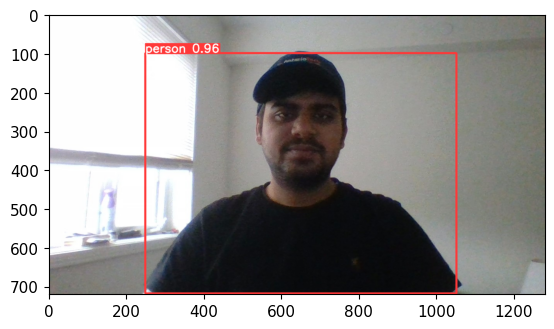

In [98]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Explanation:

The %matplotlib inline line makes it possible for the picture to be shown with the objects that have been found in the Jupyter Notebook environment.

By calling the results object's render() method, the plt.imshow(np.squeeze(results.render())) line shows the image with the found objects. The np.squeeze() function gets rid of any singleton dimensions in the picture array that is created. This makes it work with the imshow() function.

Lastly, the plt.show() line shows the rendered picture that has the objects that were found.


In [99]:
results.render()

[array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [120, 114, 102],
         [119, 113, 101],
         [118, 112, 100]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [121, 115, 103],
         [121, 115, 103],
         [120, 114, 102]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [122, 116, 104],
         [122, 116, 104],
         [121, 115, 103]],
 
        ...,
 
        [[115, 116, 102],
         [115, 116, 102],
         [117, 115, 103],
         ...,
         [167, 167, 165],
         [168, 168, 166],
         [168, 168, 166]],
 
        [[119, 117, 104],
         [119, 117, 104],
         [119, 117, 105],
         ...,
         [167, 166, 164],
         [166, 166, 164],
         [166, 166, 164]],
 
        [[119, 117, 104],
         [120, 118, 105],
         [121, 119, 107],
         ...,
         [166, 165, 163],
  

# 4. Train from scratch

The first few lines bring in the modules that are needed. These are uuid for making unique file names, os for working with file paths, and time for adding delays.

In [115]:
import uuid   # Unique identifier
import os
import time

IMAGES_PATH = os.path.join('data', 'images') #/data/images tells the computer where to save the pictures it takes in the data/images area.
The labels = ['hat', 'nohat'] and number_imgs = 20 lines define the labels for the images to be captured and the number of images to be captured for each label, respectively.

In [116]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['hat', 'nohat']
number_imgs = 20

This block allows you to capture images from the default camera and save them to the data/images directory, with the images labeled as 'hat' or 'nohat'. These images can then be used to train a custom YOLOv5 model.
Inside this loop:

The ret, frame = cap.read() line captures a frame from the camera.
The imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') line generates a unique file name for the image, combining the label and a UUID (Universally Unique Identifier).
The cv2.imwrite(imgname, frame) line saves the captured frame to the specified file path.
The cv2.imshow('Image Collection', frame) line displays the captured frame in a window named 'Image Collection'.
The time.sleep(2) line introduces a 2-second delay between image captures.

In [117]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [118]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\hat.50d4d48f-fd18-11ee-9159-b6b898b21f37.jpg


In [119]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\hat.51d0e2cd-fd18-11ee-8b3a-b6b898b21f37.jpg
data\images\hat.51d0e2ce-fd18-11ee-bc1a-b6b898b21f37.jpg
data\images\hat.51d0e2cf-fd18-11ee-b562-b6b898b21f37.jpg
data\images\hat.51d0e2d0-fd18-11ee-8bb4-b6b898b21f37.jpg
data\images\hat.51d0e2d1-fd18-11ee-b432-b6b898b21f37.jpg
data\images\hat.51d0e2d2-fd18-11ee-8e47-b6b898b21f37.jpg
data\images\hat.51d0e2d3-fd18-11ee-8e58-b6b898b21f37.jpg
data\images\hat.51d0e2d4-fd18-11ee-a81b-b6b898b21f37.jpg
data\images\hat.51d0e2d5-fd18-11ee-beee-b6b898b21f37.jpg
data\images\hat.51d0e2d6-fd18-11ee-957e-b6b898b21f37.jpg
data\images\hat.51d0e2d7-fd18-11ee-99a2-b6b898b21f37.jpg
data\images\hat.51d0e2d8-fd18-11ee-b176-b6b898b21f37.jpg
data\images\hat.51d0e2d9-fd18-11ee-bbe1-b6b898b21f37.jpg
data\images\hat.51d0e2da-fd18-11ee-8939-b6b898b21f37.jpg
data\images\hat.51d0e2db-fd18-11ee-9e3a-b6b898b21f37.jpg
data\images\hat.51d0e2dc-fd18-11ee-806c-b6b898b21f37.jpg
data\images\hat.51d0e2dd-fd18-11ee-ace1-b6b898b21f37.jpg
data\images\hat.51d0e2de-fd18-1

We are now going to clone the github repository for Image labelling.

In [120]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


We are going to install more dependencies, and the second line is a common installation guide for labelling images. 

In [121]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Finally we train the model

In [145]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\shave\Music\machine': No such file or directory
YOLOv5  2024-4-17 Python-3.11.9 torch-2.2.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bi

# 5. Load Custom Model

We load the trained model

In [153]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp13/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\shave/.cache\torch\hub\master.zip
YOLOv5  2024-4-17 Python-3.11.9 torch-2.2.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Use a custom image to test on the model

In [154]:
img = r"C:\Users\shave\Music\machine learnin\data\images\hat.1b8b4feb-fd18-11ee-985e-b6b898b21f37.jpg"


In [155]:
results = model(img)

In [156]:
results.print()

image 1/1: 480x640 1 hat
Speed: 8.0ms pre-process, 187.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


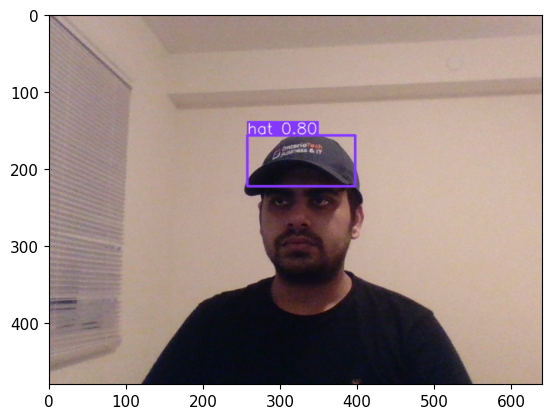

In [157]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Finally we use the live webcame with the train model to do prediction on the hat or no-hat

In [158]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Conclusion and Insights:
This project shows us how to set up a real-time hat recognition system in a complete and useful way.

The most important things we learned from this project are:

1.Why making a custom dataset is important: By making a dataset that is specific to the problem, the model can be trained on more relevant and reliable data, which leads to better performance.
2.How to use transfer learning effectively: When you use pre-trained models and tweak them on the custom dataset, you can get better results and faster growth than when you start from scratch and build a model.
3.Useful real-time application: Being able to make predictions almost in real time shows how useful the system is in the real world, where it can be used in many situations.
4.Working in groups and turning in individual peer reviews helps students learn how to work together, communicate, and be responsible for their actions. This prepares them for future projects where they will work with others.